# ´matplotlib annotations´

In [1]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [3]:
df["Total foreign born"].iloc[0]

'7,127'

In [10]:
df_nordic = df[["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]]
df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"
...,...,...,...,...,...
156,45,2,52,3,"12,518"
157,"7,542",269,"1,143",153,"37,652"
158,289,46,6,81,"14,634"
159,10,1,NaN,NaN,"1,304"


In [13]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]
df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"


In [14]:
for column in columns:
    df_nordic[column] = df_nordic[column].str.replace(",", "")

df_nordic

C:\Users\azizm\AppData\Local\Temp\ipykernel_5708\3514587597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordic[column] = df_nordic[column].str.replace(",", "")


,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,7127
1,65,12,3,21,17718
2,186,9,5,15,30216
3,5,2,NaN,5,2991
4,32,4,3,5,3301
...,...,...,...,...,...
156,45,2,52,3,12518
157,7542,269,1143,153,37652
158,289,46,6,81,14634
159,10,1,NaN,NaN,1304


In [15]:
import pandas as pd 
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]

df_nordic = df_nordic.fillna("0")

for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [25]:
df_nordic = duckdb.query(
    """
    WITH nordic AS (
        SELECT     
            state,
            SUM("Total foreign born") AS "Total foreigners",
            SUM(sweden) AS swedes,
            SUM(norway) AS norwegians,
            SUM(denmark) AS danish,
            SUM(finland) AS finnish
        FROM df
        GROUP BY state
    )
    SELECT *, 
           swedes + norwegians + danish + finnish AS nordic
    FROM nordic
    ORDER BY nordic DESC
    """
).df()

df_nordic.head()


,State,Total foreigners,swedes,norwegians,danish,finnish,nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


TODO for reader:
- more visualizations on Nordic
- more visualizations on Total forigners
- ex bar charts for different states
- compoare norsic to total foreigners

In [26]:
df_nordic.shape

(39, 7)

            swedes  norwegians   danish  finnish
State                                           
Illinois   57158.0     22300.0  10374.0    447.0
Minnesota  34984.0     17087.0   2975.0   1101.0
New York   29961.0     11752.0   6186.0   3764.0


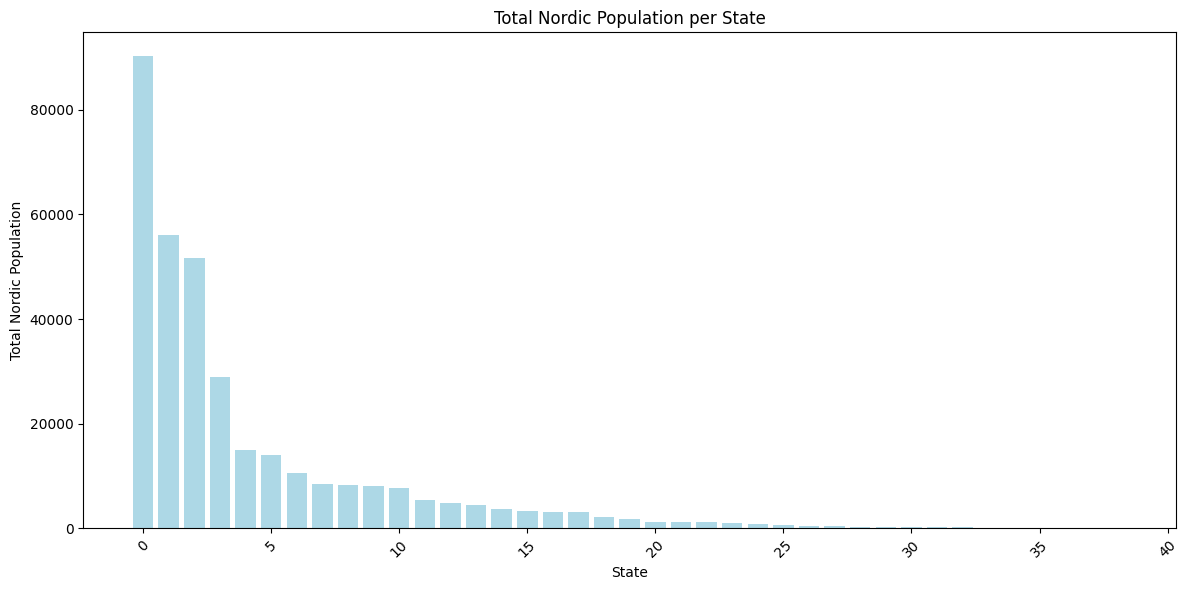

In [54]:
import matplotlib.pyplot as plt

df_nordic['nordic'] = df_nordic['swedes'] + df_nordic['norwegians'] + df_nordic['danish'] + df_nordic['finnish']

df_nordic['Total foreigners'] = df_nordic['nordic'] 

df_nordic = df_nordic.drop(columns=["Total foreigners", "nordic"])

top_3_nordic = df_nordic.set_index("State").iloc[:3]

print(top_3_nordic)

plt.figure(figsize=(12, 6))
plt.bar(df_nordic.index, df_nordic['swedes'] + df_nordic['norwegians'] + df_nordic['danish'] + df_nordic['finnish'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Total Nordic Population')
plt.title('Total Nordic Population per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

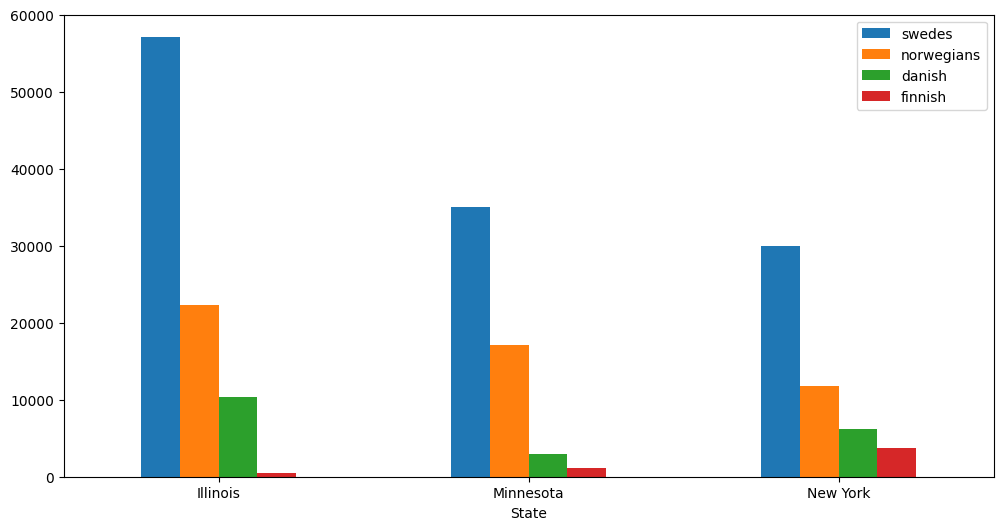

In [60]:
def nordic_plot():
    ax = top_3_nordic.plot(kind = "bar", figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

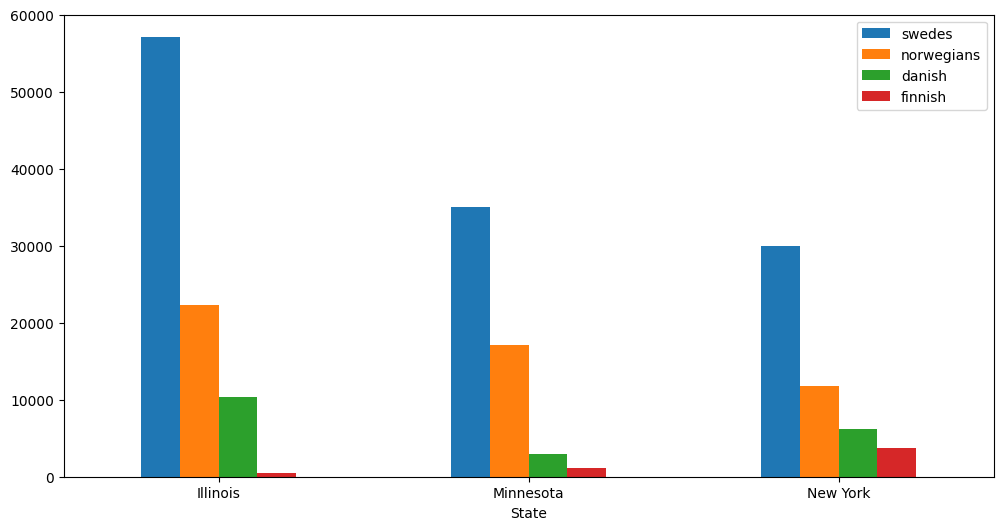

In [61]:
fig, ax = nordic_plot()

ax.containers

In [62]:
ax.containers[0]

<BarContainer object of 3 artists>

In [63]:
ax.containers[0][0]

In [65]:
ax.containers[0][1].get_height(), ax.containers[0][1].get_x()

(np.float64(34984.0), np.float64(0.75))

## Annotate

In [69]:
ax

<Axes: xlabel='State'>

Text(0.75, 40000, 'Swedes')

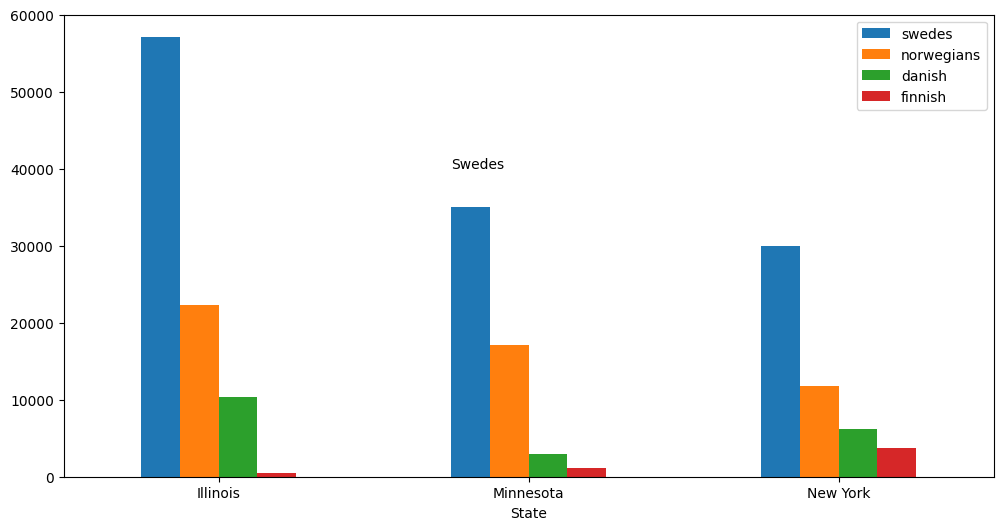

In [71]:
fig, ax = nordic_plot()

ax.annotate(text = "Swedes", xy = (0.75,40000))

Text(0.8, 42000, 'Swedes')

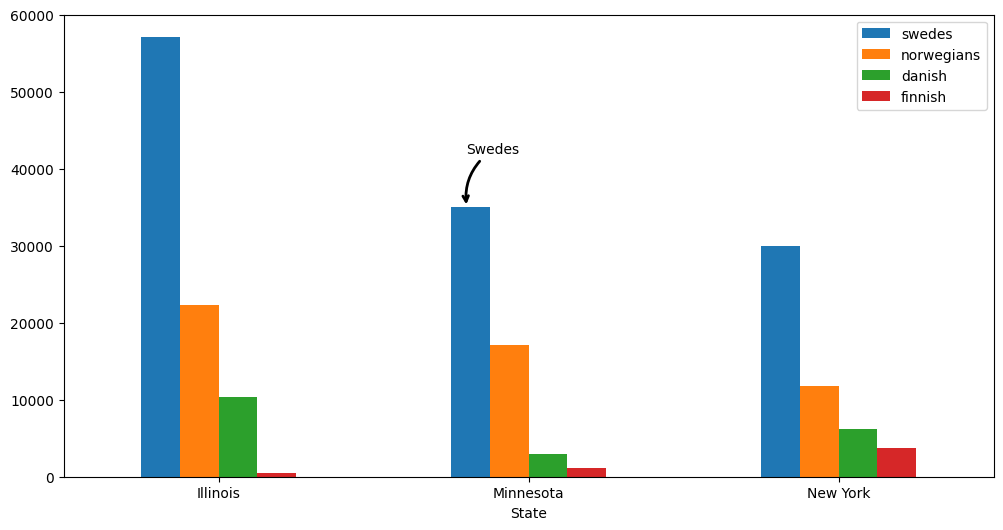

In [78]:
fig, ax = nordic_plot()

arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle = "arc3, rad=.3")
ax.annotate(text = "Swedes", xy = (0.8,35000), arrowprops=arrowprops, xytext=(.8, 42000))

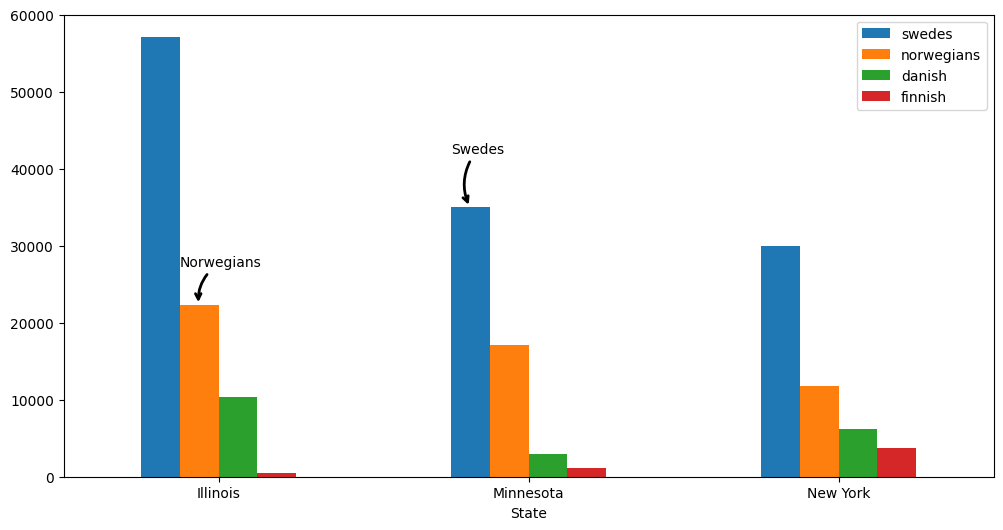

In [102]:
fig, ax = nordic_plot()

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

def annotate_nordic(bar_artist, text, x_offset=0, y_offset=0):
    xy = (bar_artist.get_x(), bar_artist.get_height())

    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle="arc3, rad=.3")
    
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.06, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset)
    )

annotate_nordic(swede_bars[1], "Swedes", x_offset=0, y_offset=7000)
annotate_nordic(norwegian_bars[0], "Norwegians",x_offset=0, y_offset=5000)


plt.show()
